# MultiShapeNet colab

In [8]:
!pip install -q sunds etils[ecolab] mediapy

In [9]:
# from etils import ecolab
from etils import ecolab
import mediapy as media
import sunds



Display big np/tf/jax arrays as image for nicer IPython display


In [5]:
builder = sunds.builder('multi_shapenet', data_dir='gs://kubric-public/tfds')
with ecolab.collapse('Dataset info:'):
  print(builder.frame_builder.info)  # Display the dataset informations

In [10]:
ds = builder.as_dataset(
    split='train', 
    # Stack all camera of a scene together
    task=sunds.tasks.Nerf(yield_mode='stacked'),
)
ds.element_spec

{'camera_name': TensorSpec(shape=(10,), dtype=tf.string, name=None),
 'color_image': TensorSpec(shape=(10, 128, 128, 3), dtype=tf.uint8, name=None),
 'frame_name': TensorSpec(shape=(), dtype=tf.string, name=None),
 'ray_directions': TensorSpec(shape=(10, 128, 128, 3), dtype=tf.float32, name=None),
 'ray_origins': TensorSpec(shape=(10, 128, 128, 3), dtype=tf.float32, name=None),
 'scene_name': TensorSpec(shape=(), dtype=tf.string, name=None)}

,,,,,,,,,

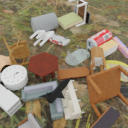
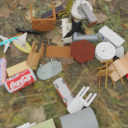
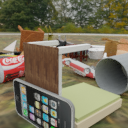
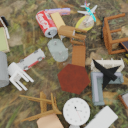
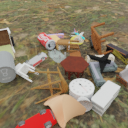
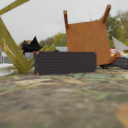
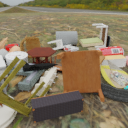
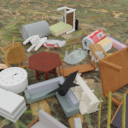
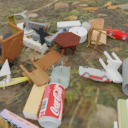
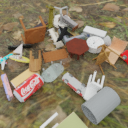

In [11]:
(ex,) = ds.take(1)
media.show_images(list(ex['color_image']))